<a href="https://www.kaggle.com/code/youssefashraf7/notebook65d104bf7f?scriptVersionId=114789100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Retail Analysis with Walmart Data
## Introduction
### This data set contains information about Historical sales data for 45 Walmart stores located in different regions are available.
### This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in which you will find the following fields:
#### • Store - the store number
#### • Date - the week of sales
#### • Weekly_Sales - sales for the given store
#### • Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
#### • Temperature - Temperature on the day of sale
#### • Fuel_Price - Cost of fuel in the region
#### • CPI – Prevailing consumer price index
#### • Unemployment - Prevailing unemployment rate
### and they have a strong relationship that we will show in this project
### Example about questions that we Interested for Analysis:
#### Which store has maximum sales?
#### Which store has maximum standard deviation i.e., the sales vary a lot
#### Some holidays have a negative impact on sales. Find out holidaysthat have higher sales than the mean sales in the non-holiday season for all stores together.
#### Provide a monthly and semester view of sales in units and give insights.
#### Plot the relations between weekly sales vs. other numeric features and give insights

## Importing Libraries

In [1]:
# import packages that we will use 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

   ##  import and display the data


In [2]:
data = pd.read_csv("../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##  clean the data


In [3]:
# explore the Properties of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.duplicated().any()

False

## Value Distribution


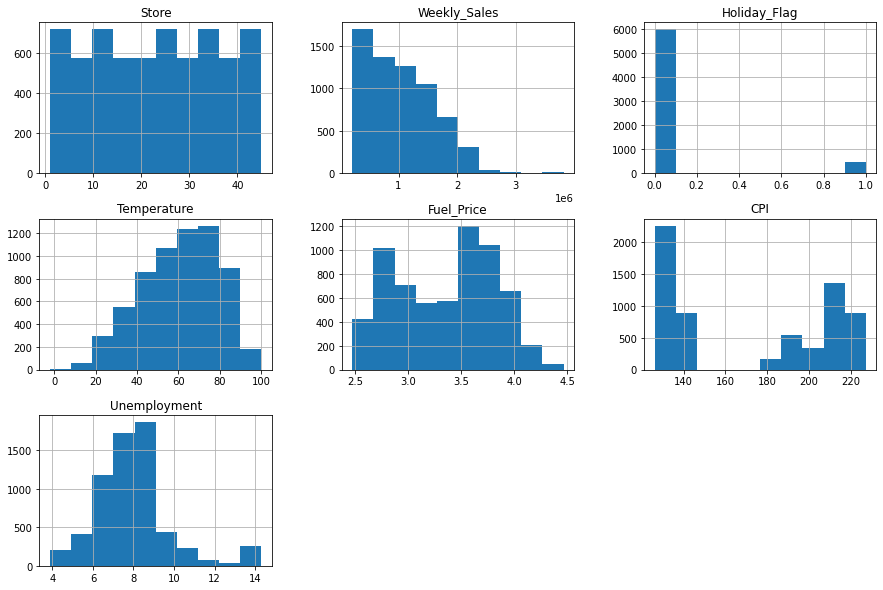

In [7]:
# hist graph about our data 
data.hist(figsize=(15,10));

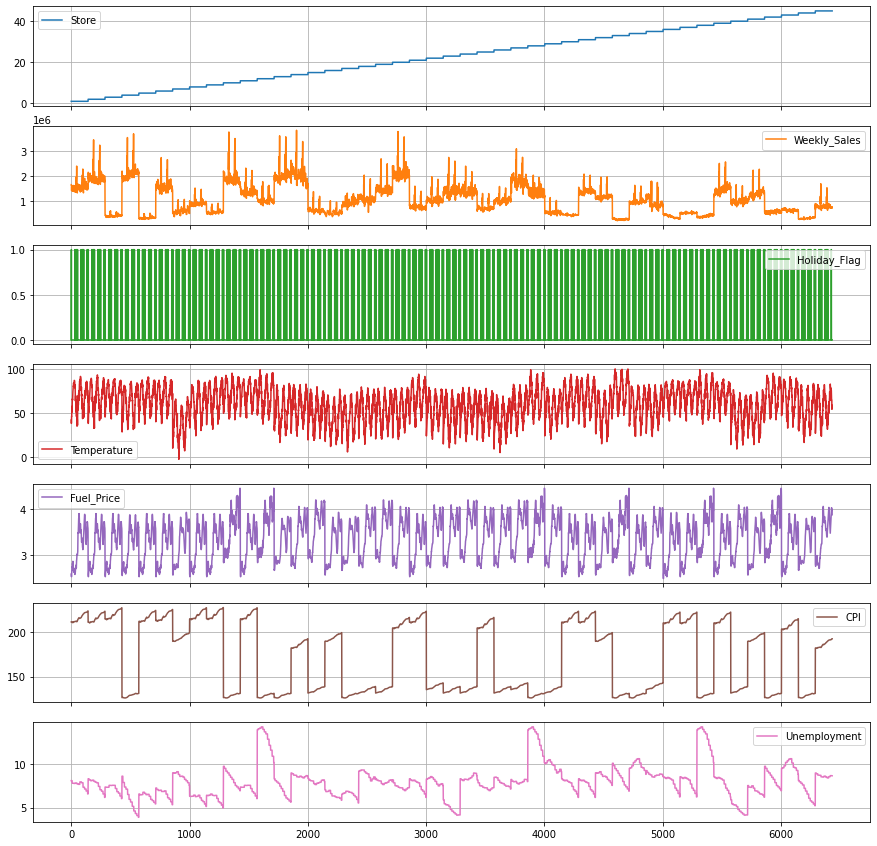

In [8]:
data.plot(subplots=True, grid=True, figsize=(15,15));

# Exploratory Data Analysis

### Research Question 1: Which store has maximum sales?


In [9]:
df1 = data.groupby("Store")["Weekly_Sales"].agg(['sum'])


In [10]:
#I take top 10 store to analysis it 
df1_top = df1.sort_values(by='sum',ascending = False).reset_index()
df_store=df1_top[0:10]
df_store

,Store,sum
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [11]:
dd = df_store.sort_values(by='sum')
dd

,Store,sum
9,39,2.074455e+08
8,1,2.224028e+08
7,6,2.237561e+08
6,27,2.538559e+08
5,10,2.716177e+08
4,2,2.753824e+08
3,13,2.865177e+08
2,14,2.889999e+08
1,4,2.995440e+08
0,20,3.013978e+08


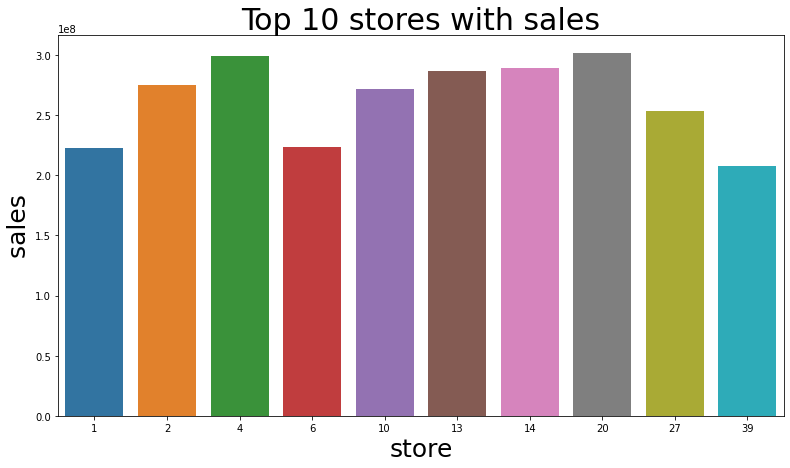

In [12]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data= dd, x="Store", y="sum", ax=ax)
plt.title('Top 10 stores with sales',size=30)
plt.xlabel("store", size=25 )
plt.ylabel(" sales ", size=25)
plt.show()

### Conclusion : Store 20 has the Maximum Weekly Sales and store 4 is close to him





### Research Question 2: Which store has maximum standard deviation?

In [13]:
std_stores = data.groupby('Store', as_index=False).agg(Std_of_Weekly_Sales=('Weekly_Sales','std'))

In [14]:
std_stores[(std_stores['Std_of_Weekly_Sales'] == max(std_stores['Std_of_Weekly_Sales']))]

,Store,Std_of_Weekly_Sales
13,14,317569.949476


In [15]:
#I take top 10 store to analysis it 
std_stores = std_stores.sort_values(by='Std_of_Weekly_Sales',ascending = False)
std_stores=std_stores[0:10]
std_stores

,Store,Std_of_Weekly_Sales
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776
22,23,249788.038068
26,27,239930.135688
1,2,237683.694682
38,39,217466.454833
5,6,212525.855862


In [16]:
ddf = std_stores.sort_values(by='Std_of_Weekly_Sales')
ddf

,Store,Std_of_Weekly_Sales
5,6,212525.855862
38,39,217466.454833
1,2,237683.694682
26,27,239930.135688
22,23,249788.038068
12,13,265506.995776
3,4,266201.442297
19,20,275900.562742
9,10,302262.062504
13,14,317569.949476


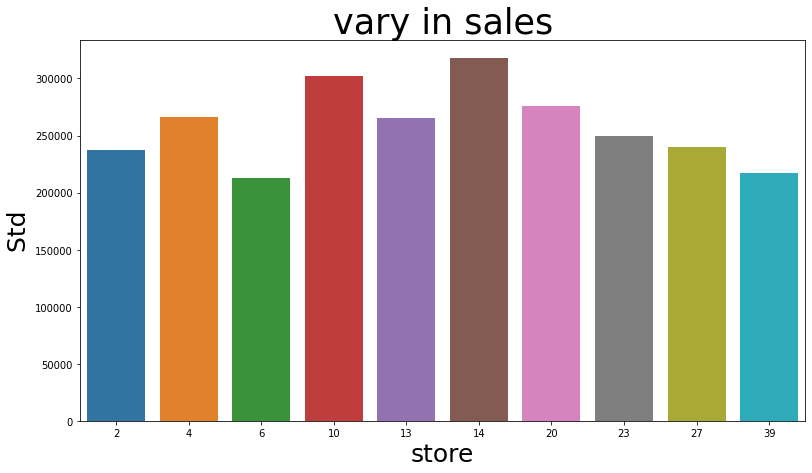

In [17]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=ddf, x="Store", y="Std_of_Weekly_Sales", ax=ax)
plt.title('vary in sales',size=35)
plt.xlabel("store", size=25 )
plt.ylabel(" Std ", size=25)
plt.show()

### Conclusion : The Weekly Sales vary a lot in Store 14



## Research Question 3: Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [18]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
df_non_holiday = data[(data.Weekly_Sales > 0) & (data.Holiday_Flag == 0)]

In [20]:
df_non_holiday.Weekly_Sales.mean()

1041256.3802088555

In [21]:
df_holiday = data[(data.Weekly_Sales > 1041256.3802088564) & (data.Holiday_Flag == 1)]

In [22]:
df_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,26-11-2010,1182500.16,1,46.15,3.039,182.783277,8.724


###  Name of the Holidays is given in the Dataset Description.

In [23]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 

In [24]:
data['Holiday'] = data['Date'].apply(assign_holiday)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Non-Holiday
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Non-Holiday
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Non-Holiday
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Non-Holiday


In [25]:
mean_df = data.groupby('Holiday').agg(Mean_Weekly_Sales=('Weekly_Sales','mean')).reset_index()
mean_df

,Holiday,Mean_Weekly_Sales
0,Christmas,9.608331e+05
1,Labour Day,1.042427e+06
2,Non-Holiday,1.041256e+06
3,Super Bowl,1.079128e+06
4,Thanksgiving,1.471273e+06


In [26]:
dd = mean_df.sort_values(by='Mean_Weekly_Sales')
dd

,Holiday,Mean_Weekly_Sales
0,Christmas,9.608331e+05
2,Non-Holiday,1.041256e+06
1,Labour Day,1.042427e+06
3,Super Bowl,1.079128e+06
4,Thanksgiving,1.471273e+06


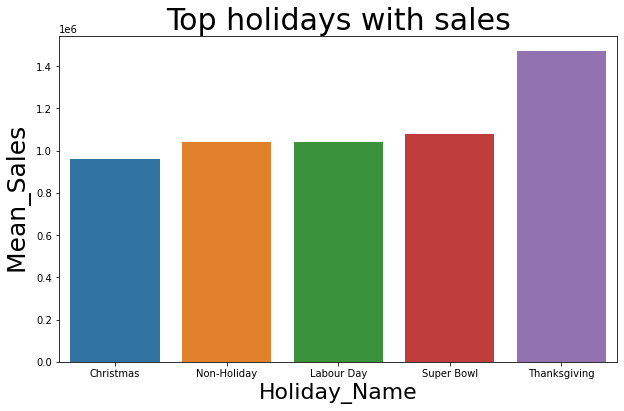

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=dd, x="Holiday", y="Mean_Weekly_Sales", ax=ax)
plt.title('Top holidays with sales',size=30)
plt.xlabel("Holiday_Name", size=22 )
plt.ylabel(" Mean_Sales ", size=25)
plt.show()

### Conclusion: Labour Day Week, Super Bowl Week and Thanksgiving Week have negative impact on Sales, which means they have higher sales than the Mean of Non-Holiday Week sales

### Question 4: Provide a monthly and semester view of sales in units and give insights.

In [28]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month

In [29]:
counts = data["Month"].value_counts()

In [30]:
data["Semester"] = "1"
data.loc[data["Month"].isin([4,5,6]), "Semester"] = "2"
data.loc[data["Month"].isin([7, 8 ,9]), "Semester"] = "3"
data.loc[data["Month"].isin([10, 11, 12]), "Semester"] = "4"

In [31]:
monthly_sales = data.groupby("Month")['Weekly_Sales'].sum()
semester_sales = data.groupby("Semester")["Weekly_Sales"].sum()

In [32]:
monthly_sales


Month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

In [33]:
semester_sales

Semester
1    1.501938e+09
2    1.826038e+09
3    1.748078e+09
4    1.661164e+09
Name: Weekly_Sales, dtype: float64

### The correlation between months and sales

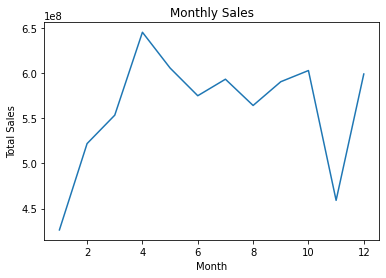

In [34]:
# plot the monthly sales
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()

#### As we can see sales tend to get higher in April and May and tend to get very low around November.

### The correlation between months and sales

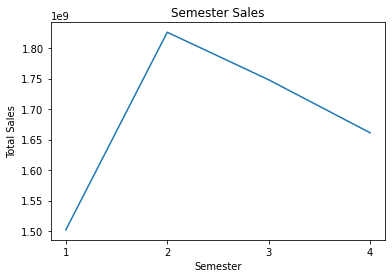

In [35]:
#plot the semester sales
plt.plot(semester_sales)
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('Semester Sales')
plt.show()

#### As we can see semester 2 is the best sales option.

### The relations between weekly sales vs. other numeric features

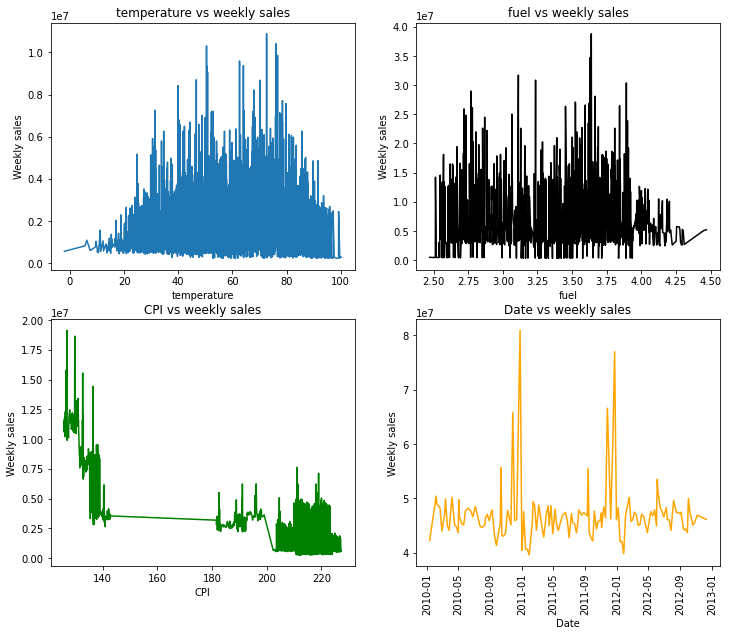

In [36]:
# make a subplot that constu=itutes of 4 different plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# the first plot is to show the correlation between temperature and weekly sales
ax[0, 0].set_title("temperature vs weekly sales")
ax[0, 0].set_xlabel("temperature")
ax[0, 0].set_ylabel("Weekly sales")
ax[0, 0].plot(data.groupby('Temperature')['Weekly_Sales'].sum())

# the second plot is to show the correlation between fuel price and weekly sales
ax[0, 1].set_title("fuel vs weekly sales")
ax[0, 1].set_xlabel("fuel")
ax[0, 1].set_ylabel("Weekly sales")
ax[0, 1].plot( data.groupby('Fuel_Price')['Weekly_Sales'].sum(), color = "black")

# the third plot is to show the correlation between CPI and weekly sales
ax[1, 0].set_title("CPI vs weekly sales")
ax[1, 0].set_xlabel("CPI")
ax[1, 0].set_ylabel("Weekly sales")
ax[1, 0].plot(data.groupby('CPI')['Weekly_Sales'].sum(), color = "green")

# the fourth plot is to show the correlation between the date and weekly sales
ax[1, 1].set_title("Date vs weekly sales")
ax[1, 1].set_xlabel("Date")
ax[1, 1].set_ylabel("Weekly sales")
plt.xticks(rotation=90 )
ax[1, 1].plot(data.groupby('Date')['Weekly_Sales'].sum(), color = "orange")

# Display the figure
plt.show()

### Basesd on our findings, it is clear that,
1) best sales are between 50 and 80 fahrenheit degrees.

2) sales get lower when fuel prices get over 4 usd and are the best when the prices are areound 3.60 usd.

3) There is a plain negative correlation between the CPI and the weekly sales.

4) weekly sales are the best in the holidays season in december.

### weekly sales vs. Unemployment rate.

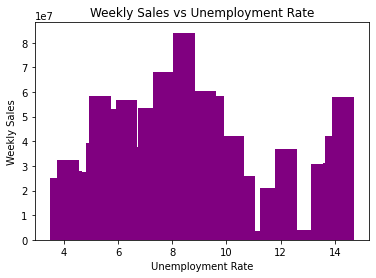

In [37]:
plt.title('Weekly Sales vs Unemployment Rate')

plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.bar(data['Unemployment'].unique(), data.groupby('Unemployment')['Weekly_Sales'].sum(), color = "purple");

#### we conclude that, when the unemployment rate is around 9, we find the best weekly sales.

### weekly sales vs. Temperature.

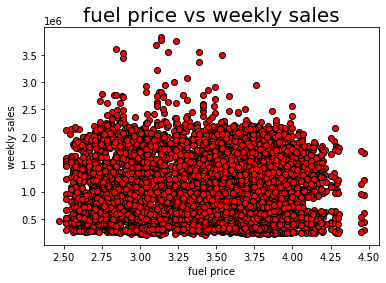

In [38]:
plt.title('fuel price vs weekly sales', fontsize=20)

# Set the x-axis label and y-axis label for the scatter plot with a red color
plt.xlabel('fuel price')
plt.ylabel('weekly sales')
plt.scatter(data['Fuel_Price'], data['Weekly_Sales'], color='red', edgecolor='black');

#### we find that sales get lower when fuel prices are over 4 usd.

### weekly sales vs. Unemployment.

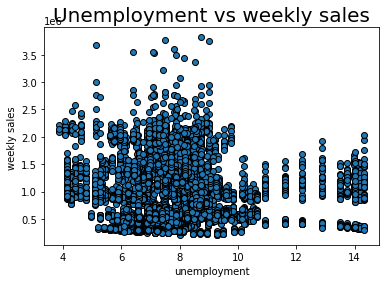

In [39]:
plt.title('Unemployment vs weekly sales', fontsize=20)

# Set the x-axis label and y-axis label for the scatter plot with a red color
plt.xlabel('unemployment')
plt.ylabel('weekly sales ')
plt.scatter(data['Unemployment'], data['Weekly_Sales'], edgecolor='black');

#### we can see that when the unemployment rate exceeds 10, sales tend to get lower.

### Holiday sales vs. non- holiday sales.

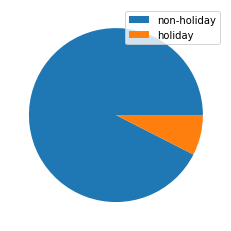

In [40]:
holiday_sales = data.groupby("Holiday_Flag")["Weekly_Sales"].sum()
plt.pie(holiday_sales)
plt.legend( ["non-holiday", "holiday"]);

#### It is worth noting that, Holiday sales make a good chunk of our sales even though, they are not that many But of course, non-holiday sales are much higher.

# Conclusions

## After analyzing the data, we conclude that:

### `1.` Store 20 has the Maximum Weekly Sales and store 4 is close to him.
### `2.` The Weekly Sales vary a lot in Store 14.
### `3.` Labour Day Week, Super Bowl Week and Thanksgiving Week have negative impact on Sales, which means they have higher sales than the Mean of Non-Holiday Week sales.
### `4.` sales tend to get higher in April and May and tend to get very low around November.
### `5.` semester 2 is the best sales option.
### `6.` best sales are between 50 and 80 fahrenheit degrees.
### `7.` sales get lower when fuel prices get over 4 usd and are the best when the prices are areound 3.60 usd.
### `8.` There is a plain negative correlation between the CPI and the weekly sales.
### `9.` weekly sales are the best in the holidays season in december.
### `10.` when the unemployment rate is around 9, we find the best weekly sales.
### `11.` sales get lower when fuel prices are over 4 usd.
### `12.` when the unemployment rate exceeds 10, sales tend to get lower.
### `13.` It is worth noting that, Holiday sales make a good chunk of our sales even though, they are not that many But of course, non-holiday sales are much higher.